# Solutions for Lecture 11 Exercises

See [today's class jupyter notebook](11-PersistenceWithPython.ipynb) for the rest of today's content. 

This notebook also requires the [TeachingPersistence.py](TeachingPersistence.py) script. 

In [1]:
import TeachingPersistence as Pers

# Standard imports 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Q1 

We're still working with the example from the main notebook: 

<img src="https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_6.jpeg" width="300">

The original function is 
```
f = {0: 8, 1: 13, 2:27, 3: 31, 4:38, 5: 52, 6: 60}
```

What happens if the function is different? Try computing the reduced matrix for the lower star filtration of these two functions:
1. `f_1 = {0: 1, 1: 3, 2:5, 3: 7, 4:9, 5: 11, 6: 13}`
2. `f_2 = {0: 8, 1: 13, 2: 27, 3: 31, 4: 38, 5: 52, 6: 15}`

- What changes (if any) occur in the simplex pairing? 
- What changes (if any) occur in the persistence diagram? 
- What changed in the function that caused (or didn't cause) differences? 
`

In [2]:
# The original simplicial complex, order doesn't matter yet
S = [[0], [1], [2], [3], [4], [5], [6],
     [0,1], [1,2], [2,3], [3,4], [4,5], [0,5], 
     [1,5], [3,5], [2,6], [3,6], [5,6], [1,6],
     [0,1,5],[3,4,5], [2,3,6], [1,5,6], [1,2,6], [3,5,6]]

In [3]:
# Storing the two functions 
f_1 = {0: 1, 1: 3, 2:5, 3: 7, 4:9, 5: 11, 6: 13}
f_2 = {0: 8, 1: 13, 2: 27, 3: 31, 4: 38, 5: 52, 6: 15}

# Making a function to get the value of a simplex
def f_val(s, f):
    return max([f[v] for v in s])

# Sorting the complex S by each of the two functions 
S_1 = Pers.colex_order(S, f_1)
S_2 = Pers.colex_order(S, f_2)

### Function 1

For this function, notice that even though the function changed, the order that the vertices entered didn't, so the pairs will end up being the same. 

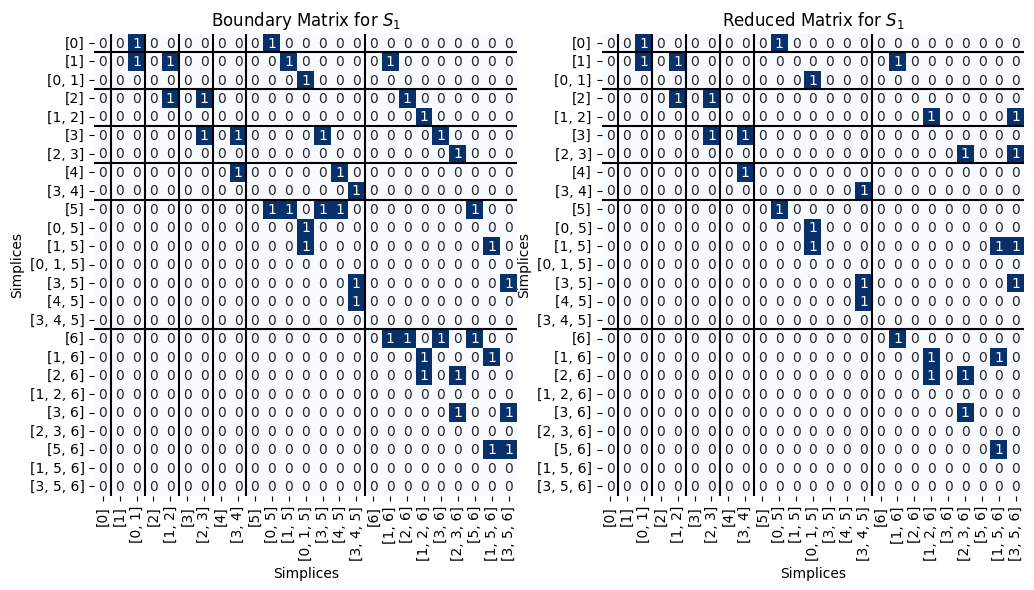

In [4]:

B_1 = Pers.boundary(S_1)
R_1, V_1, low_1= Pers.standard_persistence_reduction(B_1, return_type = 'V')

fig, ax = plt.subplots(1,2, figsize = (12,6))
Pers.drawMat(B_1, S_1, ax = ax[0])
ax[0].set_title('Boundary Matrix for $S_1$');
Pers.drawMat(R_1, S_1, ax = ax[1])
ax[1].set_title('Reduced Matrix for $S_1$');


We can go get the paired simplices. Note that this pairing is the same as on the example from the main notebook. 

In [5]:
pairs = Pers.get_pairs(low_1, S_1)
for p in pairs:
    print(p)

([0], None)
([1], [0, 1])
([2], [1, 2])
([3], [2, 3])
([4], [3, 4])
([5], [0, 5])
([1, 5], [0, 1, 5])
([4, 5], [3, 4, 5])
([6], [1, 6])
([2, 6], [1, 2, 6])
([3, 6], [2, 3, 6])
([5, 6], [1, 5, 6])
([3, 5], [3, 5, 6])


The only pairs that are off-diaongal points are the same, but the function values are different than from the original example. 

In [6]:
Pers.get_pers_points(pairs, lambda s: f_val(s, f_1))

[(1, inf), (11, 13)]

### Function 2

For this function, the order of the vertices changed, so we can expect bigger changes in the persistence diagram as well as the pairings. 

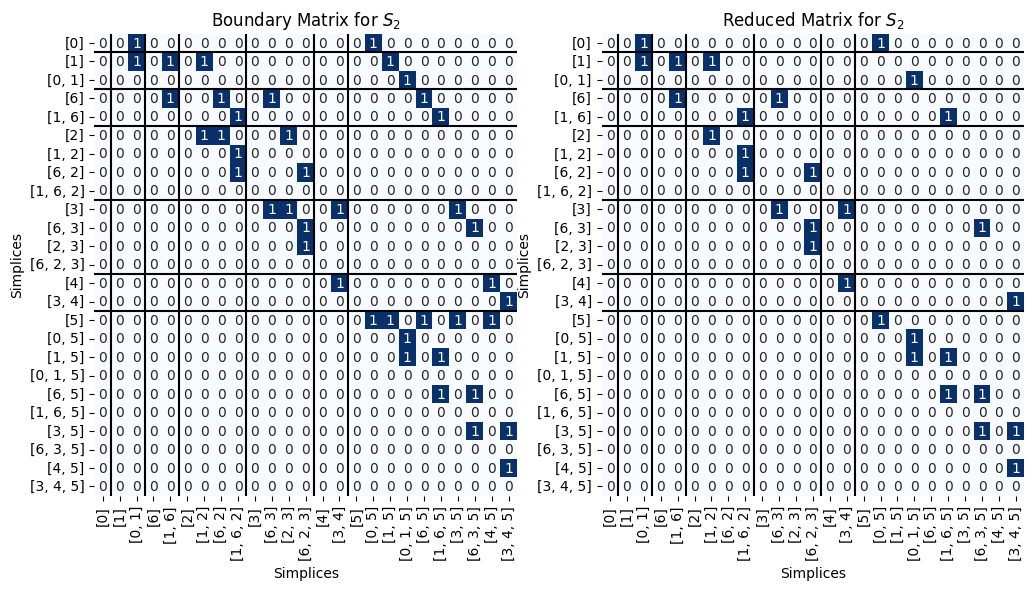

In [7]:

B_2 = Pers.boundary(S_2)
R_2, V_2, low_2= Pers.standard_persistence_reduction(B_2, return_type = 'V')

fig, ax = plt.subplots(1,2, figsize = (12,6))
Pers.drawMat(B_2, S_2, ax = ax[0])
ax[0].set_title('Boundary Matrix for $S_2$');
Pers.drawMat(R_2, S_2, ax = ax[1])
ax[1].set_title('Reduced Matrix for $S_2$');


We can go get the paired simplices. Note that this pairing is different from the example from the main notebook. 

In [8]:
pairs = Pers.get_pairs(low_2, S_2)
for p in pairs:
    print(p)

([0], None)
([1], [0, 1])
([6], [1, 6])
([2], [1, 2])
([6, 2], [1, 6, 2])
([3], [6, 3])
([2, 3], [6, 2, 3])
([4], [3, 4])
([5], [0, 5])
([1, 5], [0, 1, 5])
([6, 5], [1, 6, 5])
([3, 5], [6, 3, 5])
([4, 5], [3, 4, 5])


Now there is no non-trivial 1-dimensional homology. 

In [9]:
Pers.get_pers_points(pairs, lambda s: f_val(s, f_2))

[(8, inf)]

### Q2

Compute the 0- and 1-dimensional persistence diagram for the following simplicial complex filtration.  

![Filtration example 2](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_Filtration2_horiz-web.png)

Note that this is not a lower star filtration, so you'll just have to make a list `S_new` of the simplces that is already sorted in the right order. 

In [ ]:
S_new = [['A'], ['C'], ['F'], ['D'], ['G'], 
         ['A','C'], 
         ['E'], ['D','F'],
         ['A', 'F'], 
         ['B'], ['E','G'], 
         ['A', 'D']]

def f_val_new(simplex):
    lookup =  {'A':1, 'C':1, 'F':1, 'D':1, 'G':1, 'AC':2, 'E':3, 'DF':3,'AF':4, 'B':5, 'EG':5, 'AD':6}
    return lookup[''.join([str(v) for v in simplex])]

B_new = Pers.boundary(S_new)
R_new,U_new,low_new = Pers.standard_persistence_reduction(B_new)


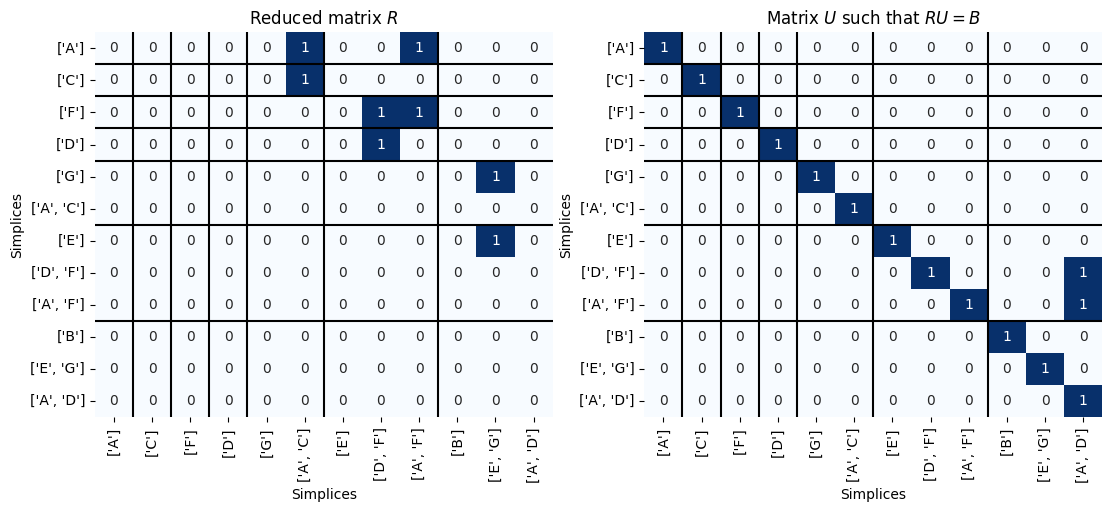

In [11]:

fig, ax = plt.subplots(1,2, figsize=(13,5))
Pers.drawMat(R_new, S_new, ax = ax[0])
ax[0].set_title('Reduced matrix $R$');
Pers.drawMat(U_new, S_new, ax = ax[1])
ax[1].set_title('Matrix $U$ such that $RU = B$');


Here are the persistence points. We can determine the dimension of the point aquired by noting the dimension of the simplex that gave birth. 

In [12]:
pairs = Pers.get_pairs(low_new, S_new)
for p in pairs: 
    print(p)

(['A'], None)
(['G'], None)
(['C'], ['A', 'C'])
(['D'], ['D', 'F'])
(['F'], ['A', 'F'])
(['B'], None)
(['E'], ['E', 'G'])
(['A', 'D'], None)


In [13]:
Pers.get_pers_points(pairs, f_val_new)

[(1, inf), (1, inf), (1, 2), (1, 3), (1, 4), (5, inf), (3, 5), (6, inf)]

Since this code to get the points will do things in the same order as the pairs was passed in, we know that the 0-dimensional diagram has points:
- `(1, inf)`
- `(1, inf)`
- `(1, 2)`
- `(1, 3)`
- `(1, 4)`
- `(5, inf)`
- `(3,5)`

The 1-dimensional diagram has just the infinite class
- `(6, inf)`